# Setup

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from simple_segment import segment, fit
import matplotlib

## Overview of Data

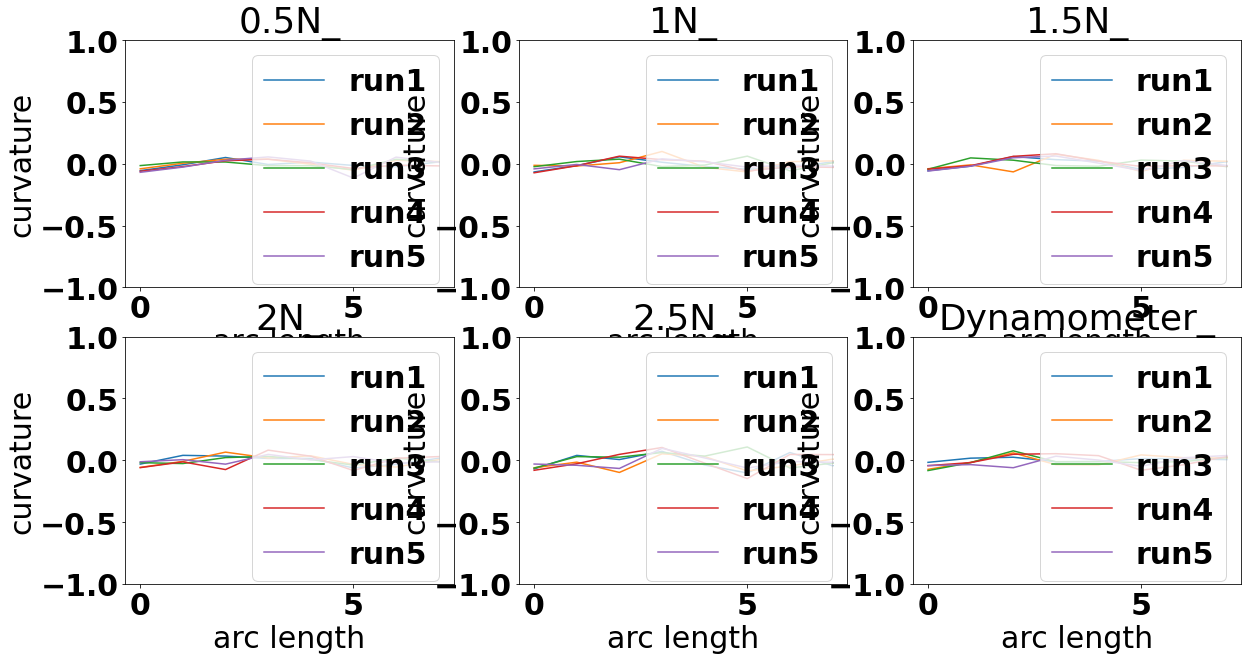

In [ ]:
folder = "Neelesh_Data/"
force_string = ["0.5N_","1N_","1.5N_","2N_","2.5N_","Dynamometer_"]
run_string = ["run1","run2","run3","run4","run5"]

plt.figure(figsize=(20,10))

for force_ind in range(len(force_string)):
    plt.subplot(2,3,force_ind+1)
    plt.title(force_string[force_ind])
    for run in run_string:

        file = folder + force_string[force_ind] + run + ".json"

        with open(file,"r") as json_file:
            data = json.load(json_file)

        exp_params = data["experiment_parameters"]
        data = data["data"]

        curvatures = data[0]['curvatures']

        plt.plot(curvatures[10:18])
        plt.xlabel('arc length')
        plt.ylabel('curvature')
        plt.legend(run_string)
        plt.ylim((-1,1));

[(0, -0.030549522732677394, 2, -0.06638289479786637), (2, -0.06638289479786637, 3, 0.09633887866236794), (3, 0.09633887866236794, 5, -0.06301460591903532), (5, -0.06301460591903532, 7, -0.01622639740606967)]
4


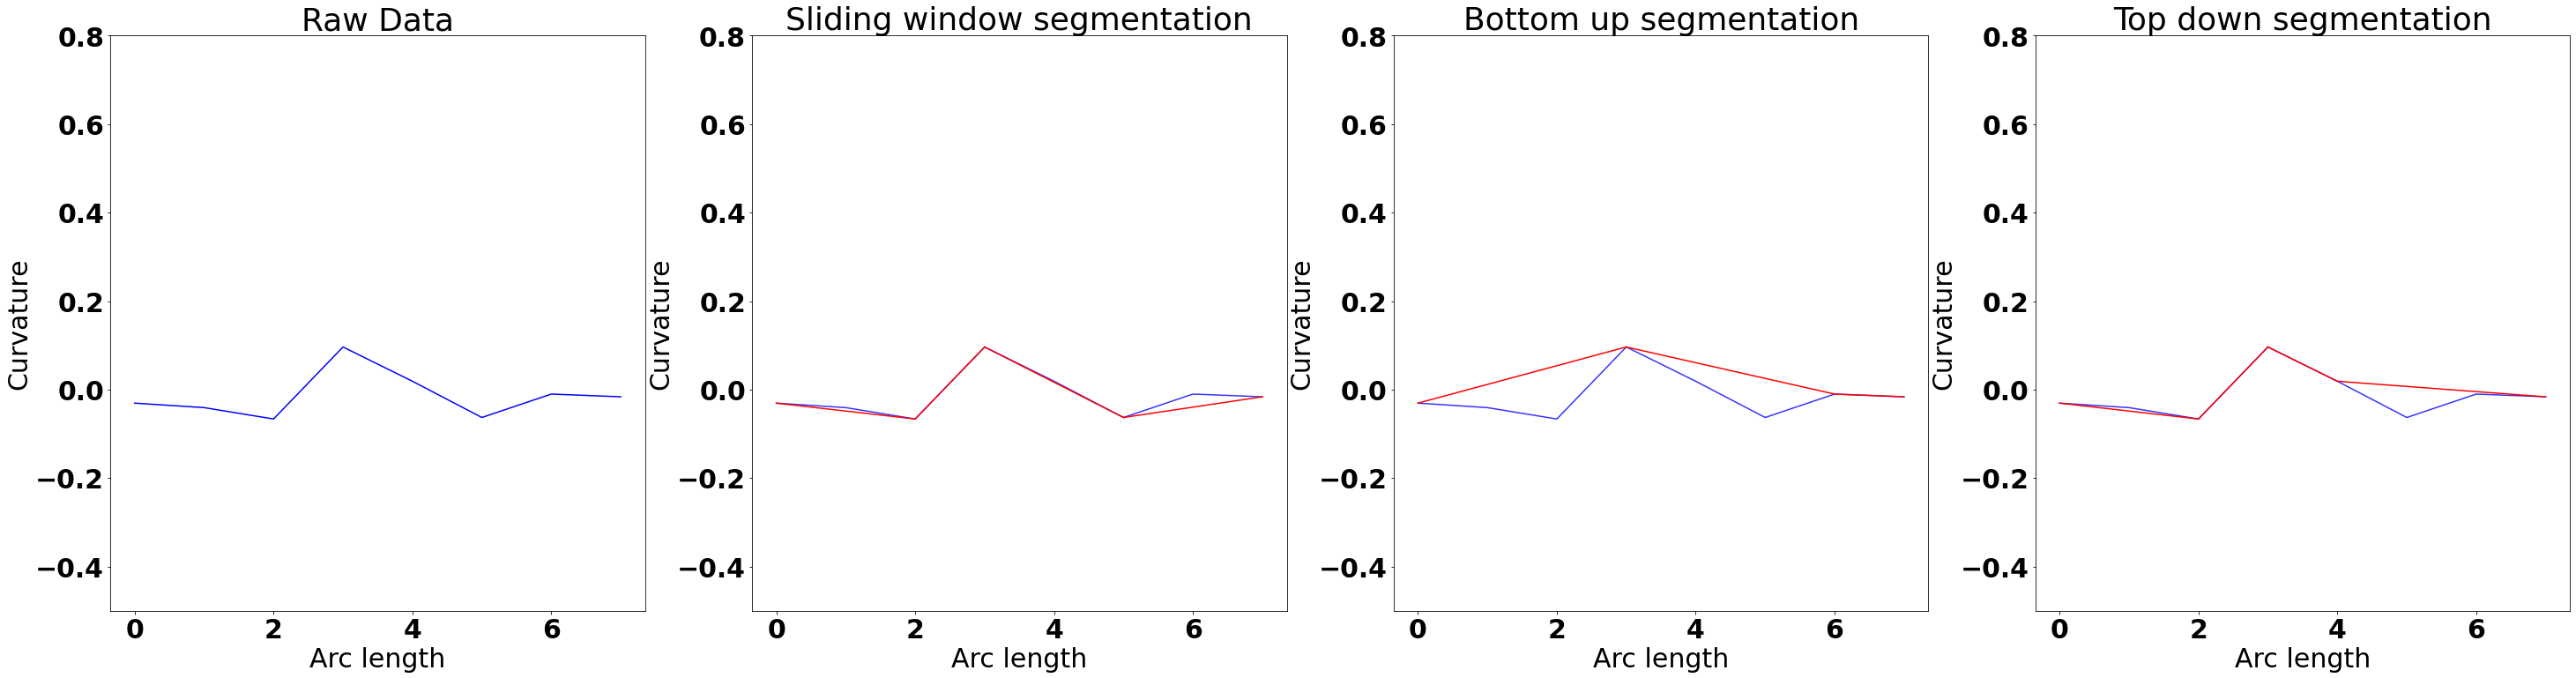

In [ ]:
with open("Neelesh_Data/2.5N_run5.json") as json_file:
    data = json.load(json_file)

data = data["data"]

curvatures = data[0]['curvatures'][10:18]

max_error = 0.005

font = {'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

fig=plt.figure(figsize=(50,12))

plt.subplot(1,4,1)
plt.plot(curvatures,'b')
plt.xlabel('Arc length')
plt.ylabel('Curvature')
plt.title('Raw Data')
plt.ylim((-0.5,0.8));

xtick = [0,1,2,3,4,5,6,7,8]

plt.subplot(1,4,2)
segments = segment.slidingwindowsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Sliding window segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

print(segments)
print(len(segments))

plt.subplot(1,4,3)
segments = segment.bottomupsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Bottom up segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

plt.subplot(1,4,4)
segments = segment.topdownsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Top down segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

# Curvature Equations

\begin{equation}
\kappa = \frac{2|\kappa_{app}|}{N} \tag{1}
\end{equation}

\begin{equation}
\theta_b=atan2(\kappa_{app}) \tag{2}
\end{equation}

$\kappa$ = curvatures

$\kappa_{app,i}$ = apparent curvatures (points in the direction of the $i^{th}$ core from center core)

$\theta_b$ = bend angle (angle between curvature vector and $x$-axis

$N$ = Number of outer cores

# Cosserat Rod Theory Equations
### Equilibrium Equations

\begin{equation}
\frac{dn}{ds} = -\hat{u}n-f \tag{3}
\end{equation}

\begin{equation}
\frac{dm}{ds} = -\hat{u}m-\hat{v}n-l \tag{4}
\end{equation}

$n$ and $m$ are $[3\times1]$ internal force and internal moment vectors

$\hat{u}$ and $\hat{v}$ are the $[3\times3]$ angular and linear strain matrices in skew-symmetric form

$f$ and $l$ are the $[3\times1]$ **external** distributed force and moments 

Skew-symmetric definition:

$$
\boldsymbol{a}=\left[\begin{array}{c}
a_1 \\
a_2 \\
a_3
\end{array}\right] \tag{11}
$$

$$
\widehat{\boldsymbol{a}}=\left[\begin{array}{lll}
0 & -a_{3} & a_{2} \\
a_{3} & 0 & -a_{1} \\
-a_{2} & a_{1} & 0
\end{array}\right] \tag{5}
$$

### Constitutive Equations

\begin{equation}
v = K_v^{-1}n+v_0 \tag{6}
\end{equation}

\begin{equation}
u = K_u^{-1}m+u_0 \tag{7}
\end{equation}

$v$ and $u$ are the $[3\times1]$ linear and angular strain

$K_v^{-1}$ is the $[3\times3]$ shear and axial stiffness matrix:

$$
\boldsymbol{K}_{\mathrm{v}}=\left[\begin{array}{lll}
G & 0 & 0 \\
0 & G & 0 \\
0 & 0 & E
\end{array}\right] A \tag{8}
$$

 - $A$ = cross-sectional area of the rod
 - $E$ = Young's Moduli of the rod
 - $G$ = Shear Moduli of the rod

$K_u^{-1}$ is the $[3\times3]$ bending and torsional stiffness matrix:

$$
\boldsymbol{K}_{\mathrm{u}}=\left[\begin{array}{lll}
E & 0 & 0 \\
0 & E & 0 \\
0 & 0 & G
\end{array}\right] J \tag{9}
$$

Rotational inertia matrix $J$:

$$
J=\left[\begin{array}{lll}
I_{xx} & 0 & 0 \\
0 & I_{yy} & 0 \\
0 & 0 & I_{zz}
\end{array}\right] \tag{10}
$$

For a circular rod:

$I_{xx}=I_{yy}=\frac14\pi r^4$

$I_{zz}=I_{xx}+I_{yy}=\frac12\pi r^4$


### Assumptions:

 - Rod's axial stiffness is much larger than the rod's bending stiffness
 - Negligible linear strain : $v=v_0=[0,0,1]^T$ (axial forces disregarded)
 - External loads limited to point forces and distributed forces ; no **external** point or distributed moments : $l=0$
 - Negligible torsion : $u[3]=0$ - Therefore, angular strain only in $x$ and $y$ direction:

$$
\boldsymbol{u}=\left[\begin{array}{c}
\kappa \cos \theta_{b} \\
\kappa \sin \theta_{b} \\
0
\end{array}\right] \tag{11}
$$

## Solving the Equations

### Boundary Value Problem Approach

 - Requires knowledge of internal force and moment $n$ and $m$ at the base and tip of the rod
 - Problem: internal forces and moments unknown at the base
 - Solution: Shooting methods (reducing to a system of solvable Initial Value Problems)

### Initial Value Problem 

- Alternative approach
- Assume rod is rigidly fixed at base ($s=0$)
  - Internal force and moment are zero at tip: at $s=L$  , $n = m = 0$
  - Provided there is no external force or moment on the tip
  - Otherwise, equal to external force and moment: $n=F_{ext}$ and $m=M_{ext}$

Steps to solve:

1.  Break up integration process into smaller set of integrations based on location of external point loads 
2. Use external point loads as boundary conditions at that location

### Example: Point force $F$ at $s=\frac L2$ and point moment $M$ at $s=\frac L3$

Solution is divided into 3 integration sets:

1. $n=0$ and $m=0$ at $s=L$
2. $n^- = n^+ + F_{L/2}$ at $s=\frac L2$
3. $m^- = m^+ + M_{L/3}$ at $s=\frac L3$